<a href="https://colab.research.google.com/github/TasnimJahan/IDT/blob/main/Supervised%3A%20Parkinson's%20disease%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***supervised leaning for Parkinson disease detection***

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# File path in Google Drive (adjust the path according to where you saved it)
file_path = '/content/drive/MyDrive/MS shadat sir/parkinson dataset/For supervised/pd_speech_features.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Check the first few rows
df.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


## ***1. Basic Exploration of the Dataset:***

In [3]:
# Get a summary of the dataset (data types, missing values, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None


In [4]:
# Check for missing values
print(df.isnull().sum())

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


## ***2. Preprocessing the Data:***

In [5]:
# Standardize or normalize features:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Assuming that 'class' is the target column and the rest are features
X = df.drop(columns=['class'])  # Features
y = df['class']                 # Target

# Standardize the feature data
X_scaled = scaler.fit_transform(X)

## ***3. Split the Data into Training and Testing Sets***

In [6]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(X_train.shape, X_test.shape)

(604, 754) (152, 754)


## ***4. Train a Supervised Learning Model:***
Exploring different models can help you find one that performs better
1. Random Forest
        Random Forest Accuracy: 0.88(got this)
2. Support Vector Machine (SVM)
        SVM Accuracy: 0.86(got this)
3. Gradient Boosting Classifier
        Gradient Boosting Accuracy: 0.85(got this)
4. XGBoost
        XGBoost Accuracy: 0.90(got this)
5. Logistic Regression
        Logistic Regression Accuracy: 0.87(got this)
6. Ensamble XGBoost model with Support Vector Machine (SVM)using a Voting Classifier
        Voting Ensemble (XGBoost + SVM) Accuracy: 0.90 (got this)
        F1 scoe also improved here.






In [7]:

# # ensamble XGBoost model with Support Vector Machine (SVM)using a Voting Classifier


from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Initialize models
xgb_model = XGBClassifier(eval_metric='mlogloss')  # XGBoost
svm_model = SVC(probability=True)  # SVM with probability for soft voting

# Create Voting Classifier (Ensemble) with soft voting
voting_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('svm', svm_model)
], voting='soft')

# Train the ensemble model
voting_model.fit(X_train, y_train)

# Predict using the ensemble model
y_pred = voting_model.predict(X_test)





## ***5. Evaluate the Model:***


## ***`i. Evaluation & Classification Report`***
A classification report shows the precision, recall, and F1-score for each class.

In [8]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}, \nRecall: {recall:.2f}, \nF1-Score: {f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.90
Precision: 0.91, 
Recall: 0.82, 
F1-Score: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.66      0.77        38
           1       0.90      0.98      0.94       114

    accuracy                           0.90       152
   macro avg       0.91      0.82      0.85       152
weighted avg       0.90      0.90      0.90       152


Confusion Matrix:
[[ 25  13]
 [  2 112]]


### ***`Plotting Confusion Matrix:`***

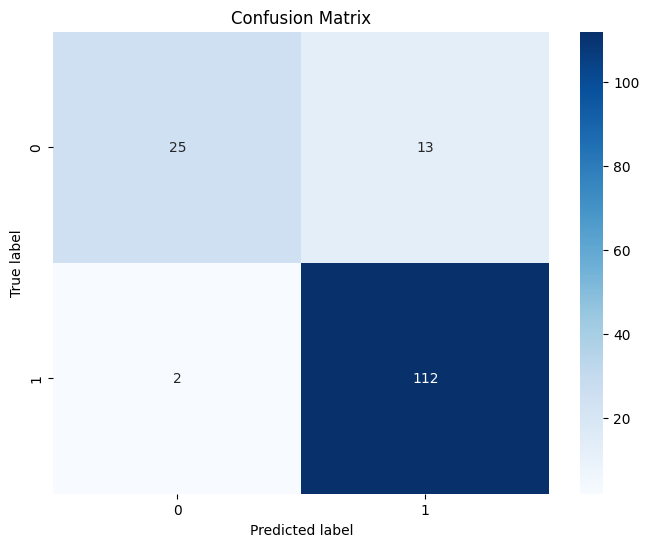

In [12]:

# # Display the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

## ***`ii. ROC-AUC Score`***
The ROC-AUC score gives a performance measure for classification problems at various threshold settings.

ROC AUC score 0.9 - 1.0: mean a Outstanding discrimination.

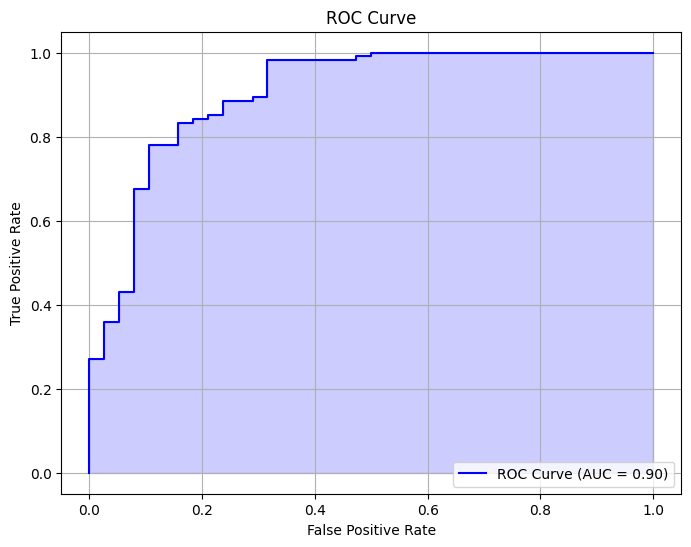

ROC AUC Score: 0.90


In [13]:

from sklearn.metrics import roc_curve, roc_auc_score

# Predicted probabilities for ROC-AUC
y_prob = voting_model.predict_proba(X_test)[:, 1]

# ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print(f"ROC AUC Score: {roc_auc:.2f}")

## ***`iii. Precision-Recall Curve : `***
A precision-recall curve helps in evaluating the trade-off between precision and recall for different thresholds.

An average precision score close to 1.0 (like 0.96) indicates that my model has a high precision for positive predictions, meaning it is correctly identifying a large proportion of the true positives relative to the false positives.

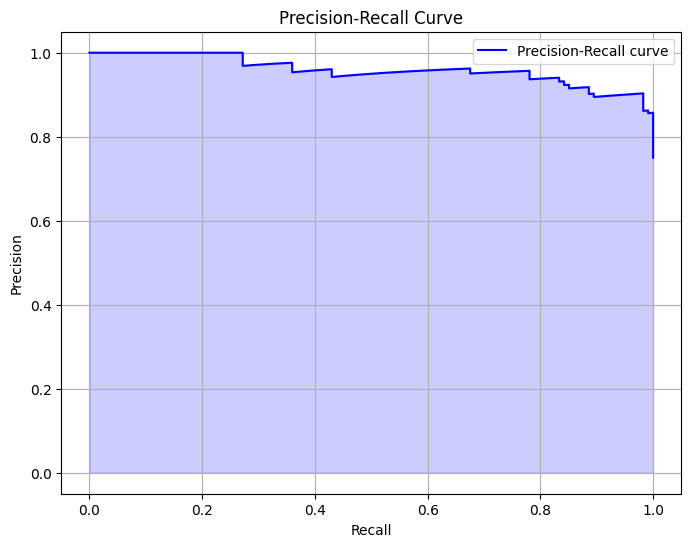

Average Precision Score: 0.96


In [14]:


from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print(f"Average Precision Score: {average_precision:.2f}")

## ***`iv. Plot F1-Score vs. Threshold Curve:`***

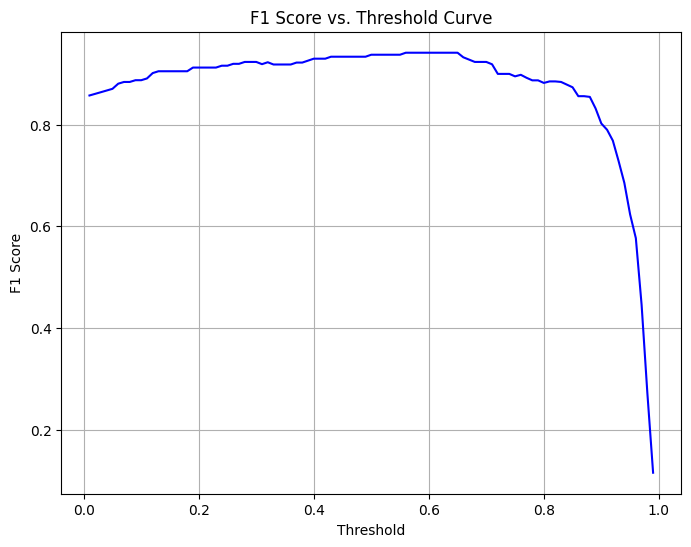

Optimal Threshold: 0.56 with F1 Score: 0.94


In [15]:


f1_scores = []
thresholds = []

# Calculate F1 score for different thresholds
for thresh in range(1, 100):
    threshold = thresh / 100
    y_pred_thresh = (y_prob >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    thresholds.append(threshold)

# Plot F1 Score vs. Threshold
plt.figure(figsize=(8,6))
plt.plot(thresholds, f1_scores, color='blue', label='F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold Curve')
plt.grid()
plt.show()

optimal_threshold = thresholds[f1_scores.index(max(f1_scores))]
print(f"Optimal Threshold: {optimal_threshold:.2f} with F1 Score: {max(f1_scores):.2f}")